In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import pickle

In [ ]:
# Load the files into DataFrames
file_paths = {
    "train_essays": "/content/drive/MyDrive/DATA_255/projecty/train_essays.csv",
    "train_prompts": "/content/drive/MyDrive/DATA_255/projecty/train_prompts.csv",
    "sample_submission": "/content/drive/MyDrive/DATA_255/projecty/sample_submission.csv",
    "test_essays": "/content/drive/MyDrive/DATA_255/projecty/test_essays.csv",
    "ai_generated_train_essays": "/content/drive/MyDrive/DATA_255/projecty/ai_generated_train_essays.csv",
    "ai_generated_train_essays_gpt4": "/content/drive/MyDrive/DATA_255/projecty/ai_generated_train_essays_gpt-4.csv"
}

dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}




In [ ]:
# Data Visualization

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Data for visualization
train_essays = dataframes["train_essays"]


In [ ]:

# Distribution of essays per prompt
plt.figure(figsize=(10, 6))
sns.countplot(data=train_essays, x='prompt_id')
plt.title('Distribution of Essays per Prompt')
plt.xlabel('Prompt ID')
plt.ylabel('Number of Essays')
plt.show()



In [ ]:
# Proportion of AI-generated essays
plt.figure(figsize=(6, 6))
train_essays['generated'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Proportion of AI-Generated Essays')
plt.ylabel('')
plt.show()

# Text length distribution
train_essays['text_length'] = train_essays['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(train_essays['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Length of Essay')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
# Load the datasets
train_essays = pd.read_csv('/content/drive/MyDrive/DATA_255/projecty/train_essays.csv')
train_prompts = pd.read_csv('/content/drive/MyDrive/DATA_255/projecty/train_prompts.csv')
ai_generated_train_essays=pd.read_csv('/content/drive/MyDrive/DATA_255/projecty/ai_generated_train_essays.csv')
ai_generated_train_essays_gpt=pd.read_csv('/content/drive/MyDrive/DATA_255/projecty/ai_generated_train_essays_gpt-4.csv')





In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")



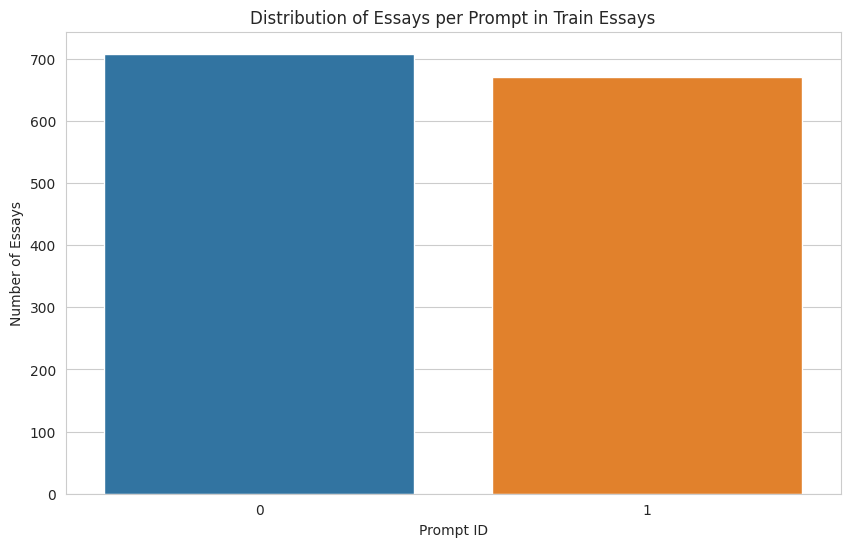

In [ ]:

# EDA on train_essays.csv

# Distribution of essays per prompt in train_essays
plt.figure(figsize=(10, 6))
sns.countplot(data=train_essays, x='prompt_id')
plt.title('Distribution of Essays per Prompt in Train Essays')
plt.xlabel('Prompt ID')
plt.ylabel('Number of Essays')
plt.show()


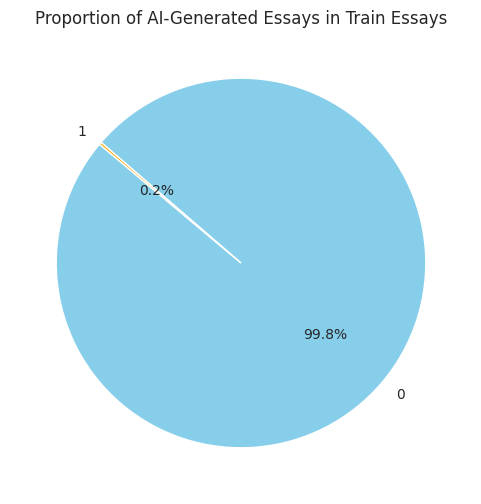

In [ ]:
# Proportion of AI-generated essays in train_essays
plt.figure(figsize=(6, 6))
train_essays['generated'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Proportion of AI-Generated Essays in Train Essays')
plt.ylabel('')
plt.show()



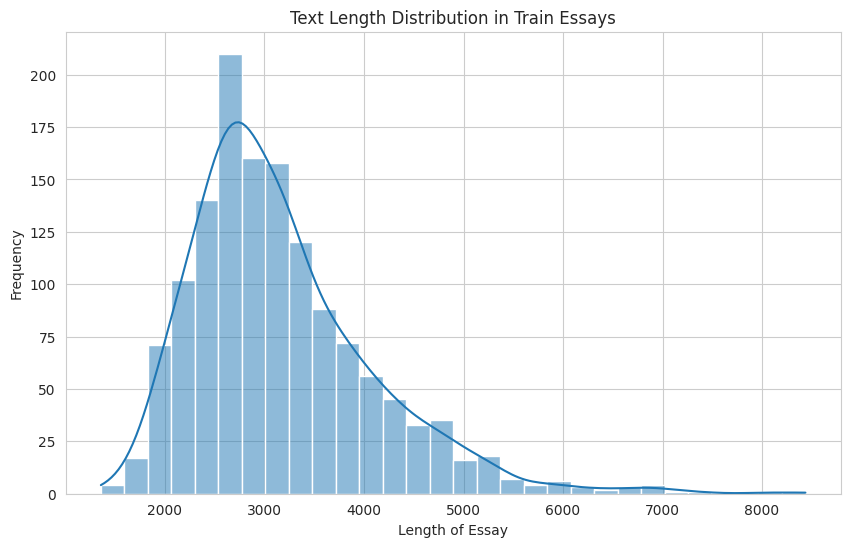

In [ ]:
# Text length distribution in train_essays
train_essays['text_length'] = train_essays['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_essays['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution in Train Essays')
plt.xlabel('Length of Essay')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# EDA on train_prompts.csv

# Count of unique prompts in train_prompts
unique_prompts_count = train_prompts['prompt_id'].nunique()



In [ ]:


# Print the count of unique prompts
print(f"Unique Prompts Count: {unique_prompts_count}")

Unique Prompts Count: 2


In [ ]:
train_essays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1378 non-null   object
 1   prompt_id    1378 non-null   int64 
 2   text         1378 non-null   object
 3   generated    1378 non-null   int64 
 4   text_length  1378 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 54.0+ KB


In [ ]:
train_essays.describe()

,prompt_id,generated,text_length
count,1378.000000,1378.000000,1378.000000
mean,0.486212,0.002177,3169.050798
std,0.499991,0.046625,920.588198
min,0.000000,0.000000,1356.000000
25%,0.000000,0.000000,2554.250000
50%,0.000000,0.000000,2985.500000
75%,1.000000,0.000000,3623.750000
max,1.000000,1.000000,8436.000000


In [ ]:
train_essays.head(10)

,id,prompt_id,text,generated,text_length
0,0059830c,0,Cars. Cars have been around since they became ...,0,3289
1,005db917,0,Transportation is a large necessity in most co...,0,2738
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0,4428
3,00940276,0,How often do you ride in a car? Do you drive a...,0,4013
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0,4698
5,00da8c32,1,The electrol college system is an unfair syste...,0,3311
6,011dc2bc,1,"Dear state senator, It is the utmost respect t...",0,2551
7,01448434,0,"Fellow citizens, cars have become a major role...",0,2470
8,01c6e176,1,"""It's official: The electoral college is unfai...",0,2707
9,0202ddf9,1,The Electoral College has been kept for centur...,0,3290


In [ ]:
train_essays.tail(10)

,id,prompt_id,text,generated,text_length
1368,fd38dd0b,0,These sources focus on the advantages of limit...,0,3086
1369,fdc74a07,0,"Cars are a very big part of our lives, we rely...",0,2691
1370,fe134dfe,0,Since World War II we have been heavily depend...,0,3889
1371,fe3724b4,0,"Driving cars can be a danger to humans, but al...",0,3140
1372,fe5b0a93,0,studies have shown that passenger cars are res...,0,2484
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0,2406
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0,2073
1375,ffa247e0,0,There's a new trend that has been developing f...,0,4339
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0,2810
1377,ffe1ca0d,0,Cars have been around since the 1800's and hav...,0,2697


In [ ]:
train_prompts.head(10)

,prompt_id,prompt_name,instructions,source_text,instructions_length,source_text_length
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",512,13081
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...,598,12213


In [ ]:
train_prompts.tail(10)

,prompt_id,prompt_name,instructions,source_text,instructions_length,source_text_length
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",512,13081
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...,598,12213


In [ ]:
ai_generated_train_essays.head(10)

,id,prompt_id,text,generated
0,d429f032,0,Advantages of Limiting Car Usage \n\nLimiting ...,1
1,1ce279be,0,Advantages of Limiting Car Usage\n\nLimiting c...,1
2,c9595213,0,Limiting car usage has numerous advantages tha...,1
3,f2266d87,0,The passages provided discuss the advantages o...,1
4,eeace4bd,0,Title: The Advantages of Limiting Car Usage\n\...,1
5,354fdce0,0,Advantages of Limiting Car Usage\n\nLimiting c...,1
6,6eaa842f,0,The advantages of limiting car usage are becom...,1
7,a36a04d5,0,Limiting car usage has numerous advantages for...,1
8,c9d5567f,0,Advantages of Limiting Car Usage\n\nLimiting c...,1
9,c2e2ead1,0,The Advantages of Limiting Car Usage\n\nIn rec...,1


In [ ]:
ai_generated_train_essays_gpt.head(10)

,id,prompt_id,text,generated
0,d62377cd,0,Title: The Benefits of Limiting Car Usage: Ins...,1
1,d721137f,0,Title: The Benefits of Limiting Car Usage\n\nI...,1
2,afc4d9ce,0,Title: The Advantages of Curtailing Car Usage:...,1
3,1dd6eddd,0,Title: The Benefits of Limiting Car Usage\n\nH...,1
4,9baa7169,0,Title: Advantages of Limiting Car Usage: A Ste...,1
5,f75b6750,0,Title: Advantages of Limiting Car Usage: An Ex...,1
6,509e6e0c,0,Title: The Advantages of Limiting Car Usage - ...,1
7,6ee1ad8b,0,Title: Advantages of Limiting Car Usage: Learn...,1
8,f405dd9e,0,Title: The Advantages of Limiting Car Usage\n\...,1
9,3888c69f,0,As we enter a new era of environmental conscio...,1


In [ ]:
# Combine the human-written essays with the AI-generated essays
combined_essays = pd.concat([train_essays, ai_generated_train_essays, ai_generated_train_essays_gpt])

# Reset the index of the combined essays dataframe
combined_essays.reset_index(drop=True, inplace=True)

# Merge the combined essays data with the prompts data on 'prompt_id'
merged_data = pd.merge(combined_essays, train_prompts, on='prompt_id', how='left')


In [ ]:
# Check the first few rows of the merged data
merged_data.head(10)

,id,prompt_id,text,generated,prompt_name,instructions,source_text
0,0059830c,0,Cars. Cars have been around since they became ...,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,005db917,0,Transportation is a large necessity in most co...,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
3,00940276,0,How often do you ride in a car? Do you drive a...,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
5,00da8c32,1,The electrol college system is an unfair syste...,0,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...
6,011dc2bc,1,"Dear state senator, It is the utmost respect t...",0,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...
7,01448434,0,"Fellow citizens, cars have become a major role...",0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
8,01c6e176,1,"""It's official: The electoral college is unfai...",0,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...
9,0202ddf9,1,The Electoral College has been kept for centur...,0,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [ ]:
# Ensure that 'text_length' is calculated for the merged data
merged_data['text_length'] = merged_data['text'].str.len()

# Now you can proceed with the aggregation as planned
agg_data = merged_data.groupby('prompt_id').agg(
    avg_length=('text_length', 'mean'),
    avg_richness=('vocab_richness', 'mean'),
    count=('id', 'count')
).reset_index()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the function to calculate vocabulary richness
def vocabulary_richness(text):
    tokens = text.split()
    return len(set(tokens)) / len(tokens) if tokens else 0

# Assuming merged_data is your merged dataframe
# Calculate vocabulary richness for each essay
merged_data['vocab_richness'] = merged_data['text'].apply(vocabulary_richness)



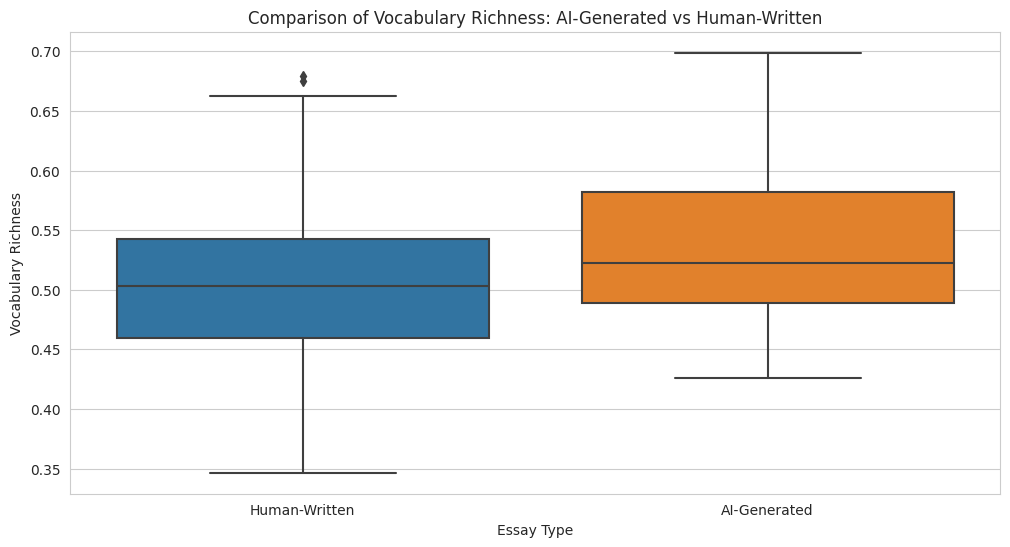

In [ ]:

# Compare vocabulary richness between AI-generated and human-written essays
plt.figure(figsize=(12, 6))
sns.boxplot(x='generated', y='vocab_richness', data=merged_data)
plt.title('Comparison of Vocabulary Richness: AI-Generated vs Human-Written')
plt.xlabel('Essay Type')
plt.ylabel('Vocabulary Richness')
plt.xticks(ticks=[0, 1], labels=['Human-Written', 'AI-Generated'])
plt.show()


In [ ]:

# Aggregate data to see the average essay length and vocabulary richness per prompt
agg_data = merged_data.groupby('prompt_id').agg(
    avg_length=('text_length', 'mean'),
    avg_richness=('vocab_richness', 'mean'),
    count=('id', 'count')
).reset_index()


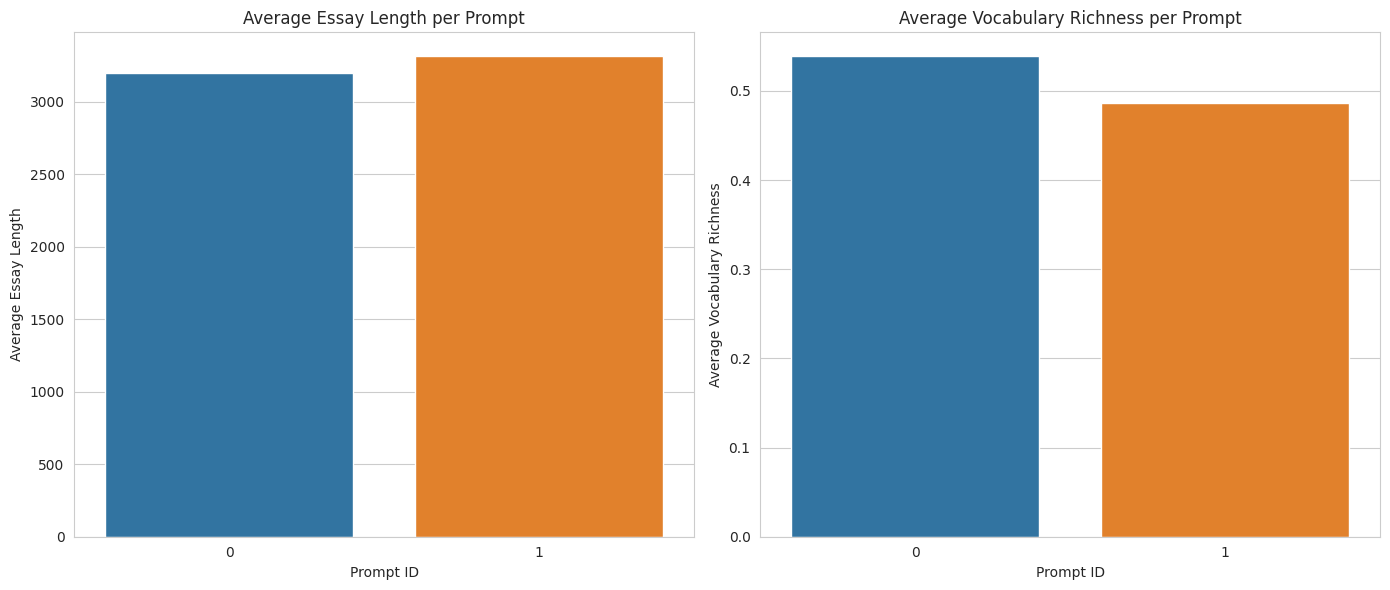

In [ ]:
# Visualize average essay length and vocabulary richness per prompt
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='prompt_id', y='avg_length', data=agg_data)
plt.title('Average Essay Length per Prompt')
plt.xlabel('Prompt ID')
plt.ylabel('Average Essay Length')

plt.subplot(1, 2, 2)
sns.barplot(x='prompt_id', y='avg_richness', data=agg_data)
plt.title('Average Vocabulary Richness per Prompt')
plt.xlabel('Prompt ID')
plt.ylabel('Average Vocabulary Richness')

plt.tight_layout()
plt.show()


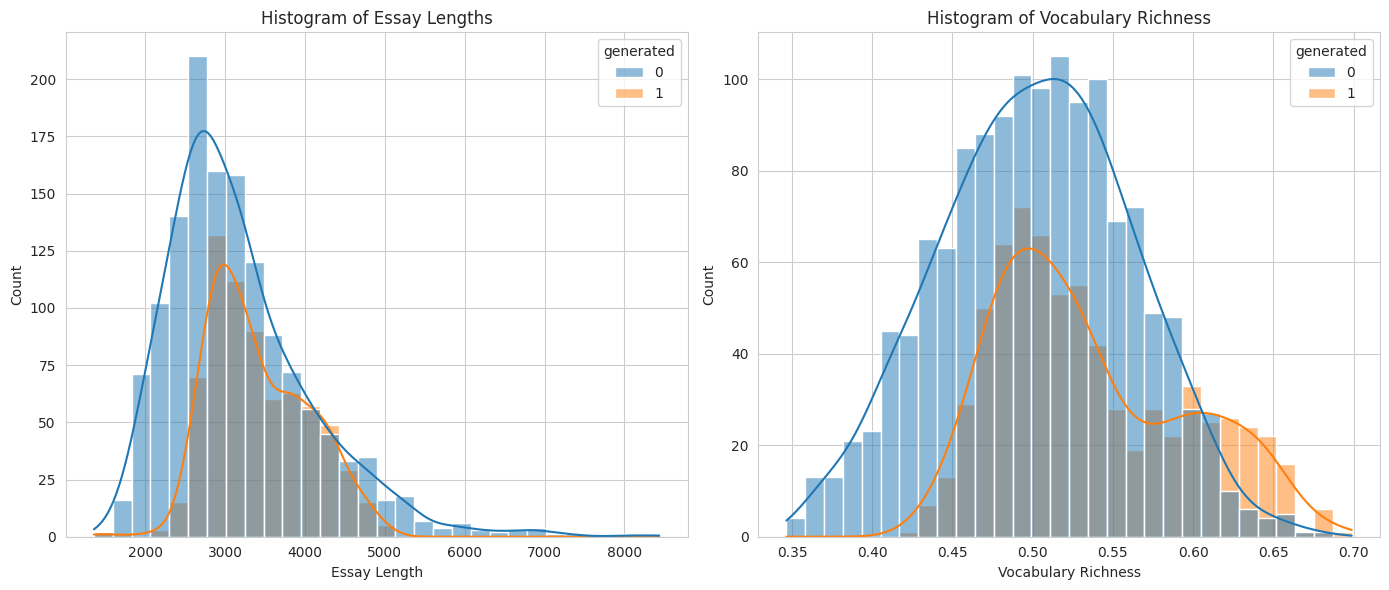

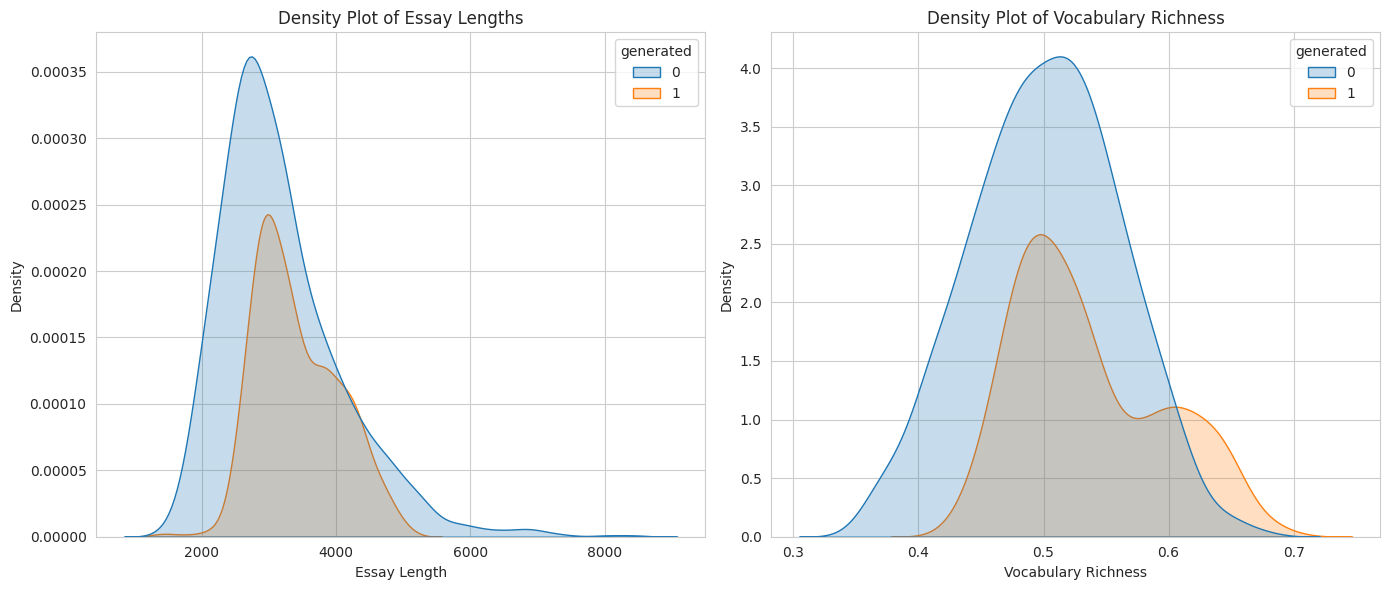

In [ ]:


# Histograms to show the distribution of essay lengths and vocabulary richness
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=merged_data, x='text_length', hue='generated', kde=True, bins=30)
plt.title('Histogram of Essay Lengths')
plt.xlabel('Essay Length')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=merged_data, x='vocab_richness', hue='generated', kde=True, bins=30)
plt.title('Histogram of Vocabulary Richness')
plt.xlabel('Vocabulary Richness')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# KDE Plots to visualize the density of these distributions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=merged_data, x='text_length', hue='generated', fill=True)
plt.title('Density Plot of Essay Lengths')
plt.xlabel('Essay Length')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(data=merged_data, x='vocab_richness', hue='generated', fill=True)
plt.title('Density Plot of Vocabulary Richness')
plt.xlabel('Vocabulary Richness')
plt.ylabel('Density')

plt.tight_layout()
plt.show()




### Histogram of Essay Lengths:
This histogram shows the distribution of essay lengths. We see two distinct distributions:
- The blue bars and line represent human-written essays, which appear to have a wider range of lengths but are mostly concentrated in a particular range (around 2000 to 4000 characters).
- The orange bars and line represent AI-generated essays, which tend to have a narrower range of lengths and are more skewed towards the lower end of the length spectrum.

The peaks of the histograms indicate the most common essay lengths for each type of essay. The KDE (Kernel Density Estimate) lines provide a smooth curve that represents the probability density of the essay lengths.

### Histogram of Vocabulary Richness:
This histogram displays the vocabulary richness, which is a measure of the diversity of the vocabulary used in the essays (calculated as the number of unique words divided by the total number of words).
- The blue distribution represents human-written essays and shows a peak around 0.5, which means that, on average, half of the words in a human-written essay are unique.
- The orange distribution for AI-generated essays shows a peak that is slightly lower than that for human-written essays, indicating that AI-generated essays may have a slightly lower vocabulary diversity.

In both histograms, the tails of the distributions (especially for AI-generated essays) show that there are essays with higher and lower vocabulary richness, suggesting variability in the lexical diversity among the essays.

### Density Plot of Essay Lengths:
This density plot is another representation of the essay length distribution, focusing on the probability density. The patterns are consistent with the histogram: human-written essays have a wider and more evenly spread distribution, while AI-generated essays have a narrower distribution.

### Density Plot of Vocabulary Richness:
Similarly, the density plot for vocabulary richness confirms the pattern seen in the histogram: human-written essays generally have a higher vocabulary richness than AI-generated essays, as indicated by the peak positions and spread of the distributions.

The key insights from these plots are:
- There is a discernible difference in the length of essays and vocabulary richness between AI-generated and human-written essays.
- Human-written essays tend to be longer and have a richer vocabulary than AI-generated essays.
- AI-generated essays have a more consistent length and slightly lower vocabulary diversity.

These insights could be valuable for building models to differentiate between AI-generated and human-written text or for understanding the characteristics of AI-generated content.

In [ ]:

import tensorflow as tf
from sklearn.model_selection import train_test_split

# Assuming merged_data is your Pandas DataFrame
# Split the data into training and testing
train_texts, test_texts, train_labels, test_labels = train_test_split(
    merged_data['text'], merged_data['generated'], test_size=0.2, random_state=42
)

# Convert the train and test datasets into TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_texts, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_texts, test_labels))

# Batch the datasets
train_dataset = train_dataset.batch(32)
test_dataset = test_dataset.batch(32)

# Define the TextVectorization layer
tokenizer = tf.keras.layers.TextVectorization(
    output_mode='int',
    output_sequence_length=512,
    standardize=None,
    ngrams=1
)

# Adapt the tokenizer to the training data
# We map to select only the text part of the dataset for adaptation
tokenizer.adapt(train_dataset.map(lambda text, label: text))

# Get the vocabulary size
VOCAB_SIZE = len(tokenizer.get_vocabulary())
print(f"Vocabulary size: {VOCAB_SIZE}")

# Now you can use the tokenizer to vectorize texts
# For example, to vectorize the texts in the first batch of the training dataset:
for text_batch, label_batch in train_dataset.take(1):
    first_batch_vectorized = tokenizer(text_batch).numpy().tolist()
    print(first_batch_vectorized)


Vocabulary size: 29418
[[163, 173, 163, 224, 315, 338, 1109, 794, 772, 224, 819, 810, 638, 329, 173, 329, 224, 315, 338, 1109, 794, 262, 585, 329, 821, 562, 46, 321, 446, 4, 379, 178, 864, 19, 2, 644, 3, 891, 4, 245, 2, 12, 17, 41, 160, 4, 59, 27, 43, 23, 10, 2, 84, 3, 2, 72, 198, 647, 940, 698, 2, 483, 45, 836, 2236, 46, 1828, 168, 9, 2, 12, 17, 57, 15, 3243, 185, 52, 11, 1287, 337, 2610, 27, 207, 48, 1793, 10, 6, 327, 43, 206, 2, 12, 17, 55, 36, 1161, 4, 15, 6, 1138, 5, 839, 656, 9, 138, 2, 236, 341, 3, 51, 42, 5, 430, 7, 2, 121, 253, 227, 3, 2, 1104, 110, 3, 2, 12, 17, 8, 2, 249, 3, 438, 113, 293, 316, 417, 325, 928, 7, 376, 2106, 3, 2, 12, 264, 2, 319, 578, 288, 3, 2, 12, 17, 1105, 742, 30, 288, 3, 2, 43, 133, 32, 212, 9, 71, 65, 559, 123, 2, 230, 3, 53, 12, 17, 23, 3460, 26, 11, 60, 276, 92, 559, 123, 2, 43, 133, 18, 530, 1858, 3, 1031, 37, 56, 7, 96, 42, 54, 448, 71, 6, 1191, 894, 7, 6, 97, 4, 220, 6, 1197, 2105, 1631, 32, 55, 289, 6, 152, 385, 5, 403, 2, 105, 10, 226, 221, 103, 

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

train_texts, val_texts, train_labels, val_labels = train_test_split(
    merged_data['text'], merged_data['generated'], test_size=0.2, random_state=42
)

# Define the TextVectorization layer
tokenizer = tf.keras.layers.TextVectorization(
    output_mode='int',
    output_sequence_length=512,  # Adjust based on your longest text
    standardize='lower_and_strip_punctuation'
)

# Adapt the tokenizer to the training data
tokenizer.adapt(train_texts)

# Define the model architecture
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size VOCAB_SIZE, and output embedding dimension of size 64.
    layers.Embedding(input_dim=len(tokenizer.get_vocabulary()), output_dim=64, mask_zero=True),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Prepare the data
train_data = tokenizer(train_texts)  # Vectorize text data
val_data = tokenizer(val_texts)

# Train the model
model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=5)


Epoch 1/5
52/52 [==============================] - 56s 904ms/step - loss: 0.3398 - accuracy: 0.8309 - val_loss: 0.0295 - val_accuracy: 0.9952
Epoch 2/5
52/52 [==============================] - 45s 868ms/step - loss: 0.0439 - accuracy: 0.9892 - val_loss: 0.0404 - val_accuracy: 0.9856
Epoch 3/5
52/52 [==============================] - 42s 815ms/step - loss: 0.0125 - accuracy: 0.9976 - val_loss: 0.0198 - val_accuracy: 0.9952
Epoch 4/5
52/52 [==============================] - 44s 836ms/step - loss: 0.0059 - accuracy: 0.9994 - val_loss: 0.0155 - val_accuracy: 0.9976
Epoch 5/5
52/52 [==============================] - 45s 860ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0341 - val_accuracy: 0.9784


In [ ]:
model.save('/content/drive/MyDrive/DATA_255/projecty/check2/model')


In [ ]:
import pandas as pd
import tensorflow as tf

# Load the test data
test_essays = pd.read_csv('/content/drive/MyDrive/DATA_255/projecty/test_essays.csv')

# Assuming 'text' is the column with the essay text
test_texts = test_essays['text']

# Preprocess the test data using the same tokenizer used for training
test_data = tokenizer(test_texts)  # Vectorize the test text data


In [ ]:
reloaded_model = tf.keras.models.load_model('/content/drive/MyDrive/DATA_255/projecty/check2/model')


In [ ]:
predictions = reloaded_model.predict(test_data)



1/1 [==============================] - 0s 306ms/step


In [ ]:
print(predictions)


[[0.533656]
 [0.533656]
 [0.533656]]
